<a href="https://colab.research.google.com/github/shristii05/ML_Project/blob/main/Naive_Bayes_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder

In [2]:
url="https://raw.githubusercontent.com/anshu7vyas/naive-bayesian-census-income/refs/heads/master/Data/adult.data.csv"
df=pd.read_csv(url)
df.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,SALARY
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AGE             32561 non-null  int64 
 1   WORKCLASS       32561 non-null  object
 2   FNLWGT          32561 non-null  int64 
 3   EDUCATION       32561 non-null  object
 4   EDUCATION-NUM   32561 non-null  int64 
 5   MARITAL STATUS  32561 non-null  object
 6   OCCUPATION      32561 non-null  object
 7   RELATIONSHIP    32561 non-null  object
 8   RACE            32561 non-null  object
 9   SEX             32561 non-null  object
 10  CAPITAL-GAIN    32561 non-null  int64 
 11  CAPITAL-LOSS    32561 non-null  int64 
 12  HOURS-PER-WEEK  32561 non-null  int64 
 13  NATIVE-COUNTRY  32561 non-null  object
 14  SALARY          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,AGE,FNLWGT,EDUCATION-NUM,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


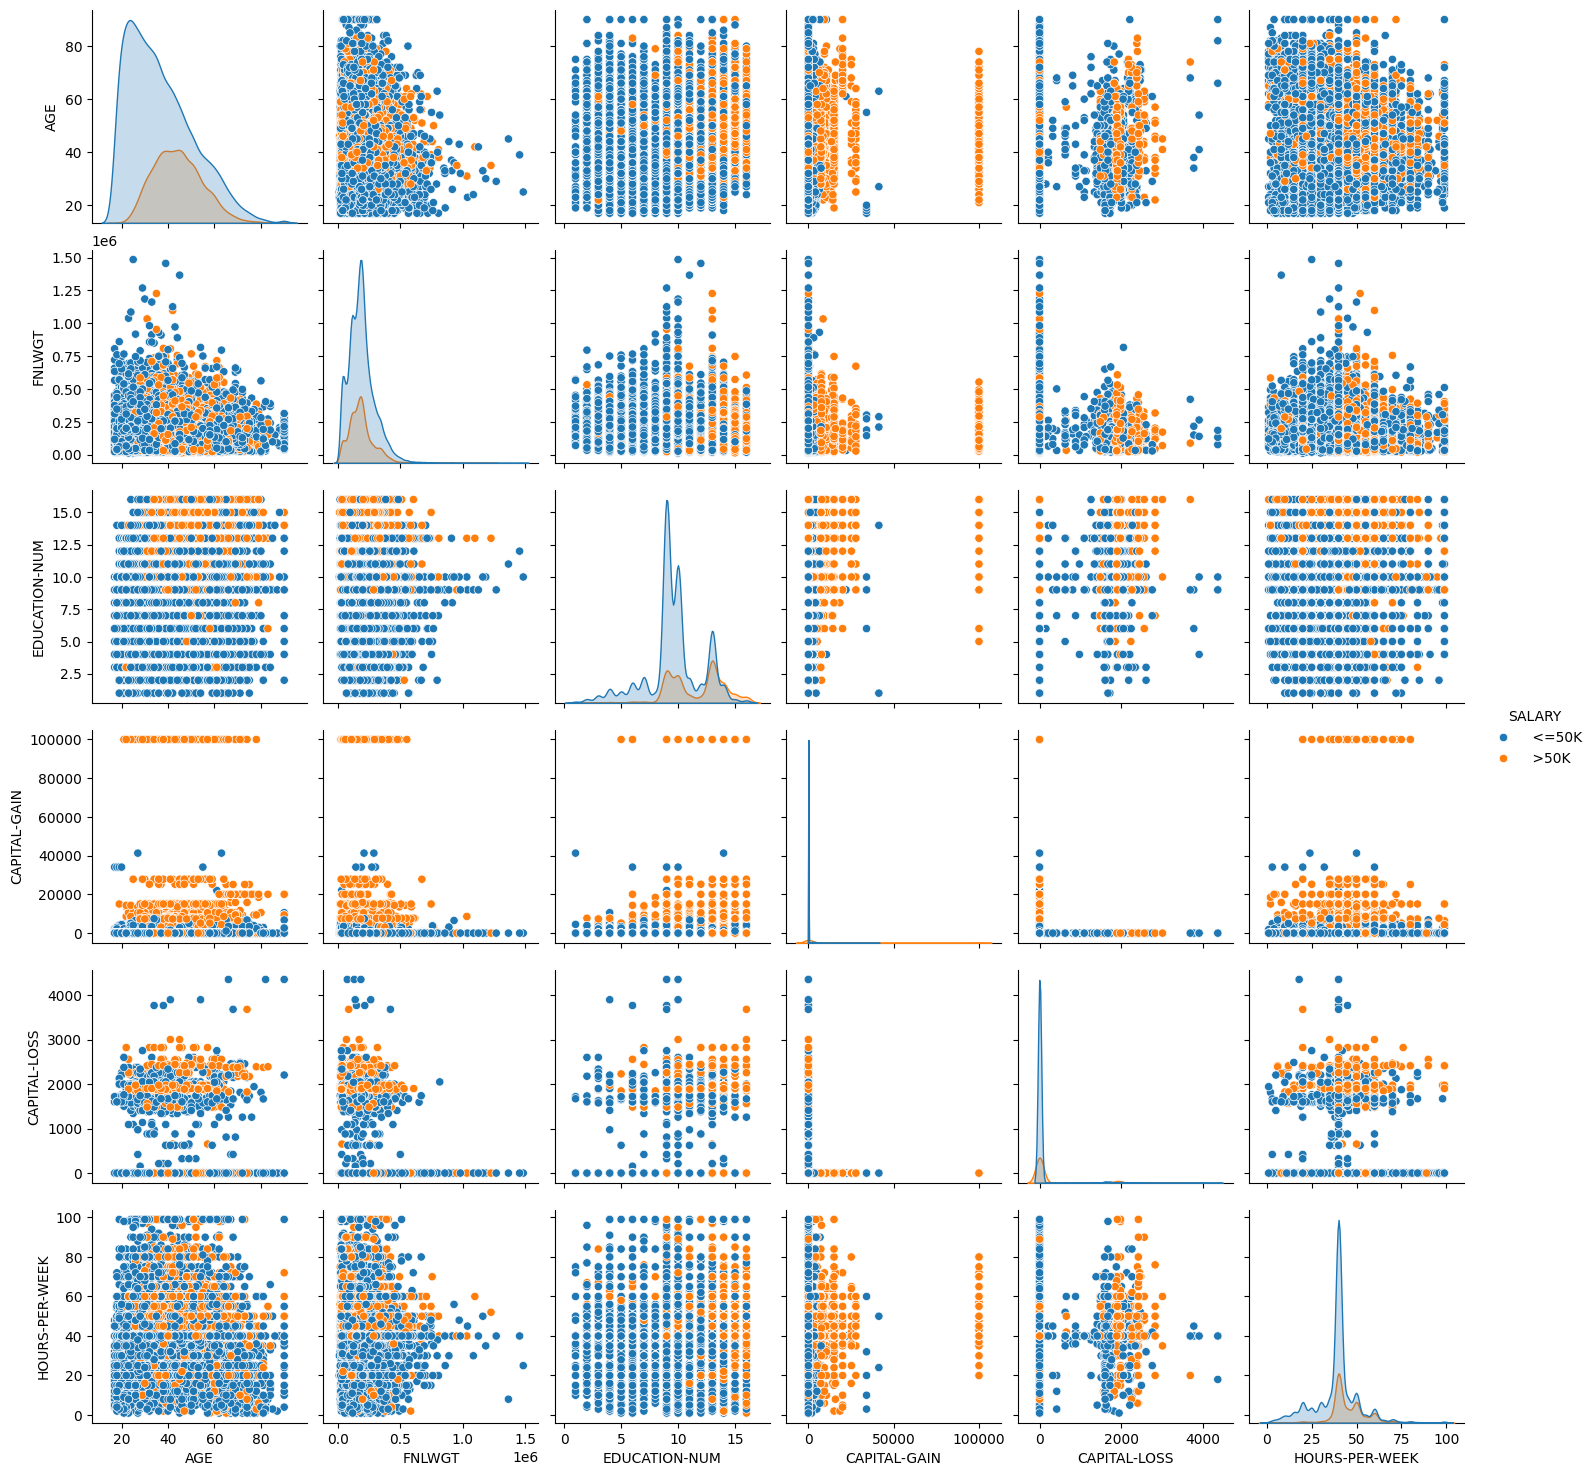

In [4]:
sns.pairplot(df, hue='SALARY')
plt.show()

In [12]:
categorical_features = ['WORKCLASS', 'EDUCATION', 'MARITAL STATUS', 'OCCUPATION','RELATIONSHIP', 'RACE', 'SEX', 'NATIVE-COUNTRY']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# Convert to DataFrame
X_train_new = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_features), index=X_train.index)
X_test_new = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_features), index=X_test.index)

In [13]:
X = df.drop('SALARY', axis=1)
y = df['SALARY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = GaussianNB()
model.fit(X_train_new, y_train)

GaussianNB()

In [16]:
X_test_new_df = pd.DataFrame(X_test_new, columns=X_train.columns)
y_pred = model.predict(X_test_new)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

Accuracy Score: 0.49547059726700443
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.97      0.35      0.51      4942
        >50K       0.32      0.96      0.48      1571

    accuracy                           0.50      6513
   macro avg       0.64      0.65      0.49      6513
weighted avg       0.81      0.50      0.50      6513



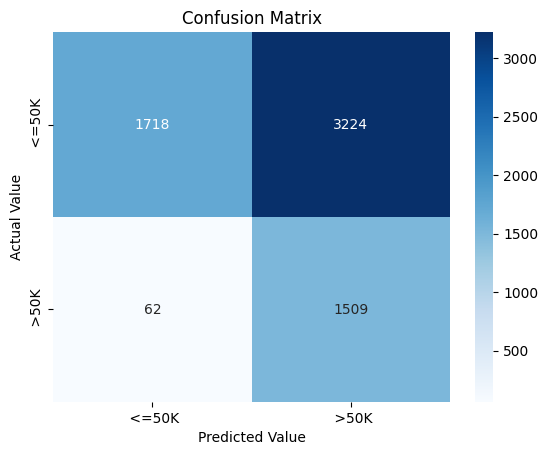

In [17]:
sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.show()